# Experimento: Classificador para viagens

## Acesso e análise dos dados

Vamos utilizar a biblioteca https://pandas.pydata.org/ para manipulação dos dados.

In [34]:
import pandas as pd

A função __[pd.read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)__ Retorna um Dataframe para manipulação dos dados.

In [35]:
dataset = pd.read_csv('viagem.csv'); 
dataset

,aparencia,temperatura,umidade,ventando,viajar
0,sol,25,72,sim,va
1,sol,28,91,sim,Nao-va
2,sol,22,70,nao,va
3,sol,23,95,nao,Nao-va
4,sol,30,85,nao,Nao-va
5,nublado,23,90,sim,va
6,nublado,29,78,nao,va
7,nublado,19,65,sim,Nao-va
8,nublado,26,75,nao,va
9,nublado,20,87,sim,va


<br>
Veja como os dados carregados foram interpretados ...

In [36]:
dataset.dtypes

aparencia      object
temperatura     int64
umidade         int64
ventando       object
viajar         object
dtype: object

<br>
Uma primeira análise dos dados númericos, como contagem, desvio padrão, entre outros. Apenas os atributos numéricos fazem parte dessa descrição. Lembre que a notação é Americana, portanto o ponto representa vírgula.

In [37]:
dataset.describe()

,temperatura,umidade
count,15.000000,15.000000
mean,23.666667,80.933333
std,3.457222,9.452639
min,19.000000,65.000000
25%,21.500000,73.500000
50%,23.000000,80.000000
75%,25.500000,88.500000
max,30.000000,95.000000


<br>
Se for necessário, possível analisar apenas um dos atributos.

In [38]:
dataset['temperatura'].mean()

23.666666666666668

<br>
Boxplot gerado com base nos dados numéricos do dataset: temperatura e humidade.<br>As colunas dividem os valores em Qaurtis (P25 = 25%, P50 = 50%, P75 = 75%)

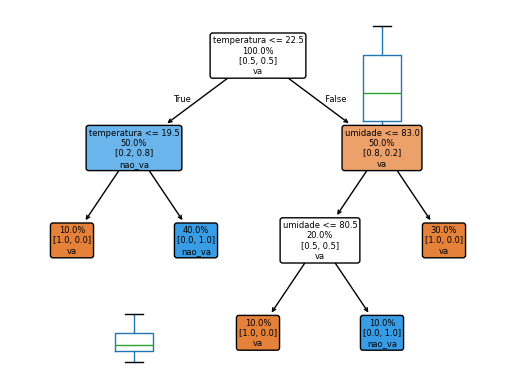

In [39]:
import matplotlib.pyplot as plt
dataset.boxplot()
plt.show()

## Pré-processamento

### Enconding
Alguns classificadores não aceitam features com valores nominais, então é necessário fazer o enconding em valore binários.
É o caso do classificador que será empregado mais adiante.<br>
__[pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)__ converte variáveis categóricas em variáveis binárias. O atributo ***drop_first=True*** produz apenas uma serie / coluna para atributos que possuem apenas dois valores

In [40]:
one_hot_dataset = pd.get_dummies(dataset,drop_first=True)
one_hot_dataset

,temperatura,umidade,aparencia_nublado,aparencia_sol,ventando_sim,viajar_va
0,25,72,False,True,True,True
1,28,91,False,True,True,False
2,22,70,False,True,False,True
3,23,95,False,True,False,False
4,30,85,False,True,False,False
5,23,90,True,False,True,True
6,29,78,True,False,False,True
7,19,65,True,False,True,False
8,26,75,True,False,False,True
9,20,87,True,False,True,True


<br>
X representa exemplos de casos (dias) e seus atributos, mas removendo o atributo classe

In [41]:
X = one_hot_dataset[one_hot_dataset.columns[:5]] 
X

,temperatura,umidade,aparencia_nublado,aparencia_sol,ventando_sim
0,25,72,False,True,True
1,28,91,False,True,True
2,22,70,False,True,False
3,23,95,False,True,False
4,30,85,False,True,False
5,23,90,True,False,True
6,29,78,True,False,False
7,19,65,True,False,True
8,26,75,True,False,False
9,20,87,True,False,True


<br>y representa a serie dos valores classe de cada exemplo

In [42]:
y = one_hot_dataset['viajar_va'] 
y

0      True
1     False
2      True
3     False
4     False
5      True
6      True
7     False
8      True
9      True
10     True
11    False
12    False
13     True
14     True
Name: viajar_va, dtype: bool

### Separação em Treino e Teste
A função __[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)__ extrai um conjunto aleatório de 70% para treino and 30% para teste

In [43]:
# Importando biblioteca de separação de treino / teste
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True) 

In [44]:
X_train

,temperatura,umidade,aparencia_nublado,aparencia_sol,ventando_sim
1,28,91,False,True,True
2,22,70,False,True,False
14,21,80,False,False,False
12,23,80,False,False,True
5,23,90,True,False,True
11,19,70,False,False,True
13,25,81,False,False,False
10,22,95,False,False,False
7,19,65,True,False,True
9,20,87,True,False,True


## Processamento

### Treinamento
Este treinamento produz um modelo de classificador supervisionado baseado no algoritmo de Árvores de Decisão.
Um exemplo complementar da biblioteca scikit-learn pode ser encontrado em https://scikit-learn.org/stable/modules/tree.html#classification

In [45]:
from sklearn.tree import DecisionTreeClassifier # Importando classificador
# Cria o objeto de um classificador de Árvores de Decisão
clf = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=1)
# Executa o treinamento (fit)
clf = clf.fit(X_train,y_train)

Como resultado do aprendizado, obtemos a seguinte árvore

In [46]:
from sklearn import tree
tree.plot_tree(clf,rounded=True,feature_names=X.columns,fontsize=6,class_names=['va','nao_va'],proportion=True, impurity=False, filled=True, label='none')

[Text(0.3333333333333333, 0.875, 'ventando_sim <= 0.5\n100.0%\n[0.4, 0.6]\nnao_va'),
 Text(0.16666666666666666, 0.625, '40.0%\n[0.0, 1.0]\nnao_va'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'aparencia_nublado <= 0.5\n60.0%\n[0.667, 0.333]\nva'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, '30.0%\n[1.0, 0.0]\nva'),
 Text(0.6666666666666666, 0.375, 'temperatura <= 19.5\n30.0%\n[0.333, 0.667]\nnao_va'),
 Text(0.5, 0.125, '10.0%\n[1.0, 0.0]\nva'),
 Text(0.8333333333333334, 0.125, '20.0%\n[0.0, 1.0]\nnao_va')]

### Teste

In [47]:
# Faz a predição dos valores para teste
y_pred = clf.predict(X_test)
X_test,y_pred

(   temperatura  umidade  aparencia_nublado  aparencia_sol  ventando_sim
 8           26       75               True          False         False
 6           29       78               True          False         False
 0           25       72              False           True          True
 3           23       95              False           True         False
 4           30       85              False           True         False,
 array([ True,  True, False,  True,  True]))

## Avaliação
*** 

**tp** (verdadeiros positivos): casos cassificados parar uma classe corretamente<br>
**fp** (falsos positivos): casos classificados para uma classe incorretamente<br>
**tn** (verdadeiros negativos): casos classificados corretamente como falsos<br>
**fn** (falsos negativos): casos considerados de outra classe mas deveriam ser da classe em questão<br>
<br>
**Suporte**: tp + fp, ou seja, o total de casos</br>
**Precisão**: tp / (tp + fp), ou seja, proporção dos acertos em classificar exemplos positivos <br>
**Recall**: tp / (tp + fn), ou seja, proporção de acertos entre todas as classes<br>
**f1-score**: média harmônica entre a Precisão e o Recall<br>
**acurácia**: soma do tp de todas as classes dividido pelo número de instâncias do dataset de teste (resulta em uma percentagem).<br>

Uma ótima imagem ilustrativa sobre estas métricas pode ser encontrada na __[Wikipédia](https://pt.wikipedia.org/wiki/Precis%C3%A3o_e_revoca%C3%A7%C3%A3o#/media/Ficheiro:Precis%C3%A3o_e_revoca%C3%A7%C3%A3o.png)__


In [48]:
from sklearn import metrics #Importando módulo de métricas para avaliação
# Acurácia do modelo, o quanto o classificador está correto?
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))

Acurácia: 0.4


In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

print(classification_report(y_test, y_pred, target_names=['va','nao_va']))                                                                              

              precision    recall  f1-score   support

          va       0.00      0.00      0.00         2
      nao_va       0.50      0.67      0.57         3

    accuracy                           0.40         5
   macro avg       0.25      0.33      0.29         5
weighted avg       0.30      0.40      0.34         5



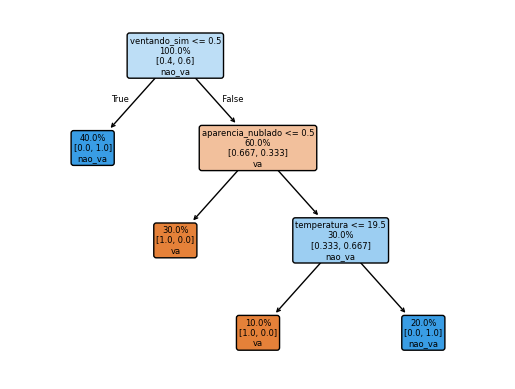

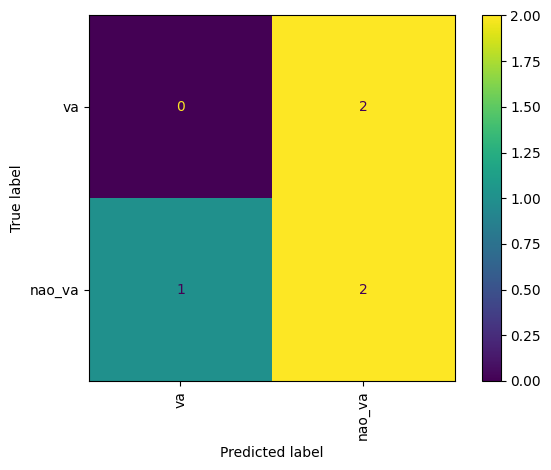

In [50]:
ConfusionMatrixDisplay.from_estimator(
    clf, X_test, y_test, display_labels=['va','nao_va'], xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()